<center>

# **22AIE401 - Reinforcement Learning**  
# **Lab 2**  

</center>

### Team Members:
- Guruprasath M R - AIE22015  
- Rudraksh Mohanty - AIE22046  
- Shree Prasad M - AIE22050  
- Tharun Kaarthick G K - AIE22062  

---

### Objective:
To implement and analyze the ε-Greedy strategy for solving the multi-armed bandit problem, using a realistic simulation: selecting ads on a website to maximize click-through rate (CTR).

---

### Problem Statement:
A website displays one of 10 possible ads to each user. Each ad has a fixed (but unknown) probability of being clicked. Your agent must learn, over time, which ads to show more often to maximize total clicks. This is a non-associative bandit setting (no context).

---

### Common Interpretation after completing tasks:
To be filled

Base Code:

True Click-Through Rates (CTR) per Ad: [0.22 0.48 0.38 0.32 0.12 0.12 0.08 0.44 0.32 0.37]


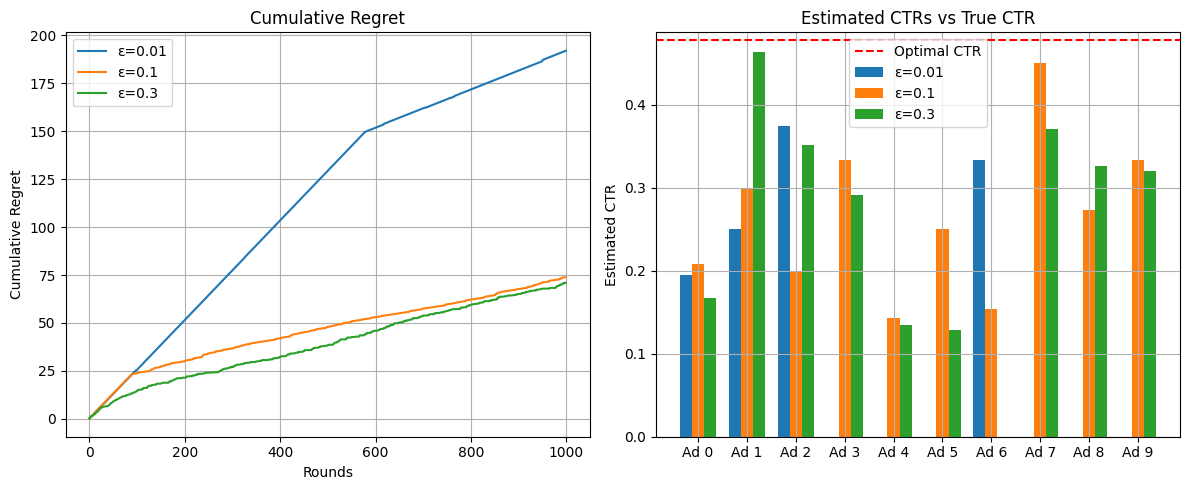

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Epsilon-Greedy agent class
class EpsilonGreedyAgent:
    def __init__(self, n_arms, epsilon):
        """
        Initialize the agent.
        
        Parameters:
        n_arms (int): Number of arms (ads/options).
        epsilon (float): Probability of exploring (choosing a random arm).
        """
        self.n_arms = n_arms
        self.epsilon = epsilon
        
        # Track how many times each arm has been pulled
        self.counts = np.zeros(n_arms)
        
        # Estimated value (CTR) for each arm, initially zero
        self.values = np.zeros(n_arms)
        
        # Total accumulated reward (for monitoring performance)
        self.total_reward = 0
        
        # Lists to store history of chosen actions and obtained rewards
        self.actions = []
        self.rewards = []
    
    def select_action(self):
        """
        Choose an action (arm) based on epsilon-greedy strategy:
        - With probability epsilon, explore (random arm).
        - Otherwise, exploit (choose the arm with highest estimated value).
        """
        if np.random.rand() < self.epsilon:
            # Exploration: randomly pick an arm
            return np.random.randint(self.n_arms)
        else:
            # Exploitation: pick arm with highest estimated CTR
            return np.argmax(self.values)
    
    def update(self, action, reward):
        """
        Update the agent's knowledge after receiving a reward from an action.
        
        Parameters:
        action (int): The arm chosen.
        reward (float or int): The reward received (0 or 1 for Bernoulli reward).
        """
        # Increment count for this action
        self.counts[action] += 1
        
        # Update estimated value for the chosen arm using incremental average
        # New estimate = Old estimate + (reward - old estimate) / number of times action taken
        self.values[action] += (reward - self.values[action]) / self.counts[action]
        
        # Accumulate total reward for performance tracking
        self.total_reward += reward
        
        # Store action and reward for possible analysis
        self.actions.append(action)
        self.rewards.append(reward)

# Simulate the multi-armed bandit problem
def simulate_bandit(true_ctrs, epsilon, n_rounds=1000):
    """
    Run the epsilon-greedy algorithm for a number of rounds.
    
    Parameters:
    true_ctrs (array): True click-through rates for each arm (unknown to agent).
    epsilon (float): Probability of exploration.
    n_rounds (int): Number of rounds to simulate.
    
    Returns:
    agent: The trained epsilon-greedy agent after simulation.
    np.cumsum(regrets): The cumulative regret over time.
    """
    n_arms = len(true_ctrs)
    agent = EpsilonGreedyAgent(n_arms, epsilon)
    
    # The optimal arm is the one with the highest true CTR (best possible choice)
    optimal_arm = np.argmax(true_ctrs)
    
    regrets = []  # Keep track of regret at each round
    
    for t in range(n_rounds):
        # Agent selects an action based on current knowledge and epsilon
        action = agent.select_action()
        
        # Generate a reward based on the true CTR of chosen arm (Bernoulli distribution)
        reward = np.random.rand() < true_ctrs[action]
        
        # Update agent with observed reward
        agent.update(action, reward)
        
        # Regret = difference in expected reward between optimal arm and chosen arm
        regret = true_ctrs[optimal_arm] - true_ctrs[action]
        regrets.append(regret)
    
    # Return the agent after training and cumulative regret over rounds
    return agent, np.cumsum(regrets)

# -------- Plotting Results --------]
def visualize():
    plt.figure(figsize=(12, 5))

    # Plot cumulative regret over time for each epsilon
    plt.subplot(1, 2, 1)
    for epsilon in epsilons:
        plt.plot(regret_curves[epsilon], label=f'ε={epsilon}')
    plt.title("Cumulative Regret")
    plt.xlabel("Rounds")
    plt.ylabel("Cumulative Regret")
    plt.legend()
    plt.grid(True)

    # Plot estimated CTRs from the agent vs the true CTRs
    plt.subplot(1, 2, 2)
    bar_width = 0.25
    x = np.arange(n_arms)

    # Plot bars for each epsilon's estimated CTR values, offset for clarity
    for i, epsilon in enumerate(epsilons):
        plt.bar(x + i * bar_width,
                agents[epsilon].values,
                width=bar_width,
                label=f'ε={epsilon}')

    # Plot a horizontal line to show the true optimal CTR (best possible)
    plt.axhline(np.max(true_ctrs), color='r', linestyle='--', label='Optimal CTR')

    plt.xticks(x + bar_width, [f'Ad {i}' for i in range(n_arms)])
    plt.ylabel("Estimated CTR")
    plt.title("Estimated CTRs vs True CTR")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------- Main Experiment --------
np.random.seed(42)  # For reproducibility

n_arms = 10  # Number of ads/arms

# Generate random true CTRs between 0.05 and 0.5 for each ad
true_ctrs = np.random.uniform(0.05, 0.5, n_arms)
print("True Click-Through Rates (CTR) per Ad:", np.round(true_ctrs, 2))

n_rounds = 1000  # Number of rounds for each experiment

# Different exploration rates to test
epsilons = [0.01, 0.1, 0.3]

# Store trained agents and regret curves for different epsilon values
agents = {}
regret_curves = {}

# Run simulations for each epsilon
for epsilon in epsilons:
    agent, regrets = simulate_bandit(true_ctrs, epsilon, n_rounds)
    agents[epsilon] = agent
    regret_curves[epsilon] = regrets
visualize()

### Task 1
Simulate multiple user segments (e.g., teenagers, adults, seniors) where each segment has a different CTR distribution per ad. Modify the bandit logic to include user context and switch ε-greedy to contextual bandit

### Task 2
Implement per-ad budget (e.g., only 100 displays allowed for premium ads). The agent must learn to prioritize high-reward ads while respecting budget constraints. Extend reward logic to penalize exceeding limits 

### Task 3
Implement three different strategies – ε-Greedy, UCB, and Softmax Selection – on the same ad simulation environment. Record cumulative reward and plot average regret. Evaluate which performs best under CTR drift. 